In [6]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import decode_predictions
from tensorflow.keras.applications.resnet50 import preprocess_input

In [7]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
from PIL import Image as PImage

In [8]:
img_width, img_height = 224, 224

In [9]:
model_pretrained = ResNet50(weights = 'imagenet', include_top = True, input_shape = (img_height, img_width ,3))

102981632/102967424 [==============================] - 1s 0us/step


In [13]:
# Insert Correct path for your image
image_path = '/content/drive/MyDrive/Computer Vision/lemon.jpg'
img = image.load_img(image_path, target_size= (img_width, img_height))
image_data = image.img_to_array(img)
img_data = np.expand_dims(image_data, axis = 0)
img_data = preprocess_input(img_data)

49152/35363 [=========================================] - 0s 0us/step


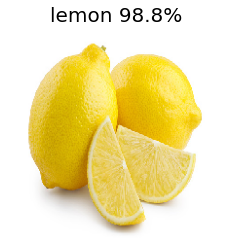

In [14]:
# Predict the result
cnn_feature = model_pretrained.predict(img_data, verbose = 0)  

# decode the results into a list of tuples (class , description, probability)
label = decode_predictions(cnn_feature)
label = label[0][0]

plt.imshow(img)


stringprint = "%.1f" % round(label[2]*100, 1)
plt.title(label[1] + " " + str(stringprint) + "%", fontsize = 20)
plt.axis('off')
plt.show()

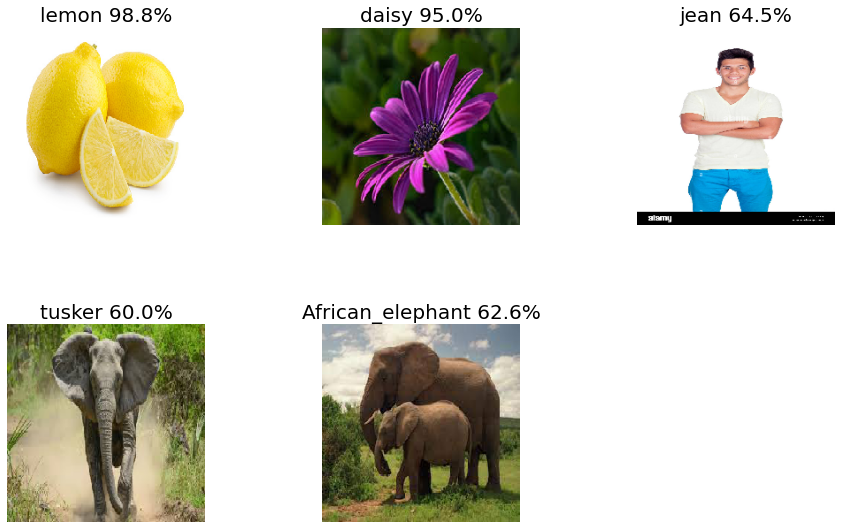

In [26]:
folder_path = '/content/drive/MyDrive/Computer Vision/'
images = os.listdir(folder_path)
images

fig = plt.figure(figsize = (16, 20))

i = 0
rows = 4
columns = 3

for image1 in images:
  i+=1
  img = image.load_img(folder_path + image1, target_size = (img_width, img_height))
  image_data = image.img_to_array(img)
  image_data = np.expand_dims(image_data, axis = 0)
  image_data = preprocess_input(image_data)

  img_feature = model_pretrained.predict(image_data)
  label = decode_predictions(img_feature)
  label = label[0][0]

  fig.add_subplot(rows, columns, i)
  fig.subplots_adjust(hspace = .5)
  plt.imshow(img)  

  stringprint = "%.1f" % round(label[2]*100, 1)
  plt.title(label[1] + " " + str(stringprint) + "%", fontsize = 20)
  plt.axis('off')
plt.show()